# Repeat Former Analysis in Logarithmic Scale

In earlier analysis, we found that the projections on PCs are not linearly related to the precipitation. The distribution of $precipitation = f(Z_{pc})$ is either *log-normal* or *quadratic-linear*. Hence, we decided to convert all DBZ data into logarithmic scale and see if the results is better.

### Explained Variance

First we look at the explained variance (as ratio) of the first 100 PCs. 

         full      fp01      fp05      fp10      fp20      fp40      ftyw
pc1  0.302187  0.319974  0.350440  0.380103  0.411281  0.485462  0.406253
pc2  0.086216  0.094635  0.089316  0.083960  0.082112  0.067883  0.102423
pc3  0.047512  0.047369  0.046560  0.046147  0.043320  0.040382  0.054302
pc4  0.035015  0.034534  0.034316  0.034912  0.036148  0.033832  0.027686
pc5  0.022230  0.022392  0.022720  0.022846  0.020091  0.020441  0.019057


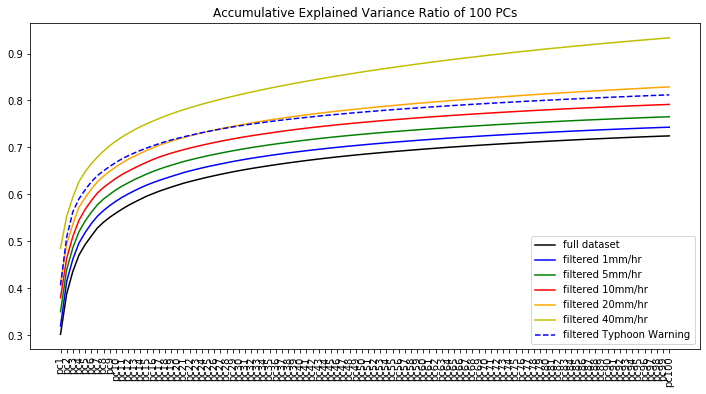

In [1]:
# Read processed data and show the explained variance ratio
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

expvar = pd.read_csv('data/expvar_ln.csv', index_col=0)
print(expvar.head())

# Making plot
plt.figure(figsize=(12,6))
plt.plot(np.cumsum(expvar.full), 'k', label='full dataset')
plt.plot(np.cumsum(expvar.fp01), 'b', label='filtered 1mm/hr')
plt.plot(np.cumsum(expvar.fp05), 'g', label='filtered 5mm/hr')
plt.plot(np.cumsum(expvar.fp10), 'r', label='filtered 10mm/hr')
plt.plot(np.cumsum(expvar.fp20), 'orange', label='filtered 20mm/hr')
plt.plot(np.cumsum(expvar.fp40), 'y', label='filtered 40mm/hr')
plt.plot(np.cumsum(expvar.ftyw), 'b--', label='filtered Typhoon Warning')
plt.xticks(rotation=90)
plt.title('Accumulative Explained Variance Ratio of 100 PCs')
plt.legend()
plt.show()

As shown in the figure above, when we applied filters to reduce the sample size, the explained variance ratio of the first few PCs increased. This should be reasonable since after filtering the data will be more homogeneous and then the variation will be reduced. Hence, fewer PCs can represent more variation in the dataset.

The size of the datasets that used to perform PCA:

|dataset|number of records|
|-------|-----------------|
|Full|34369|
|1mm/hr|11260|
|5mm/hr|4456|
|10mm/hr|2150|
|20mm/hr|858|
|40mm/hr|236|
|Typhoon warning|1517|


## PC1

We also want to know if there is difference between PCs derived from different datasets. First we recall a tool for illustrating the `6 x 275 x 162` numpy array. 

In [2]:
# Utility to plot a 6*275*162 numpy array
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from mpl_toolkits.basemap import Basemap

lat0 = 21.8875
lat1 = 25.3125
lon0 = 120.0
lon1 = 122.0125

lats = np.arange(21.8875, 25.3125, 0.0125)
lons = np.arange(120.0, 122.0125, 0.0125)

def plot_dbz_6maps(data):
    import matplotlib.pyplot as plt
    # Get data dimensions
    nl, ny, nx = data.shape
    print('Data dimensions: ' + str(nl) + ' layers of ' + str(ny) + ' x ' + str(nx))
    # Making plot
    for i in range(nl):
        ax = plt.subplot(2, nl/2, i+1)
        # create basemap
        m = Basemap(llcrnrlon=lon0, urcrnrlon=lon1, llcrnrlat=lat0, urcrnrlat=lat1, resolution='l')
        # draw coastlines on map.
        m.drawcoastlines()
        m.imshow(data[i], alpha=0.99, cmap='Greys')#, vmin=0., vmax=60.)
        m.colorbar()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.show()
    return(0)

### Data Processing

The PCA model of 100 PCs is roughly 200MB on disk, so we fisrt take out only the first 5 PCs for faster processing.

### Making plot of PC1

Full Dataset (34369 records)
Data dimensions: 6 layers of 275 x 162


C:\Users\tsyo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


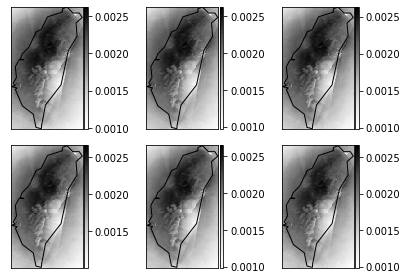

Data with Precipitation >= 1mm (11260 records)
Data dimensions: 6 layers of 275 x 162


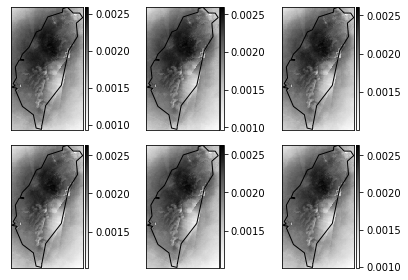

Data with Precipitation >= 5mm (4456 records)
Data dimensions: 6 layers of 275 x 162


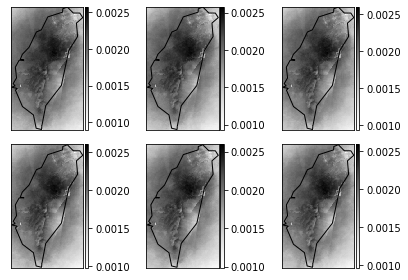

Data with Precipitation >= 10mm (2150 records)
Data dimensions: 6 layers of 275 x 162


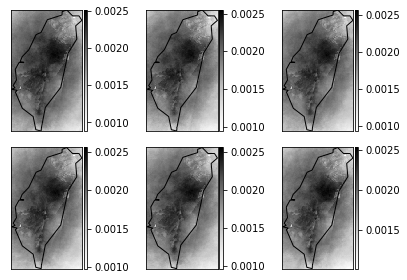

Data with Precipitation >= 20mm (858 records)
Data dimensions: 6 layers of 275 x 162


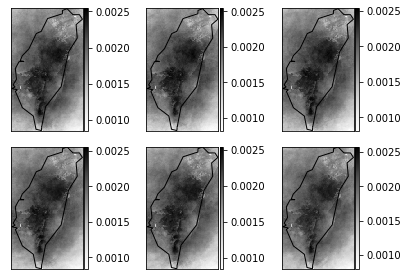

Data with Precipitation >= 40mm (236 records)
Data dimensions: 6 layers of 275 x 162


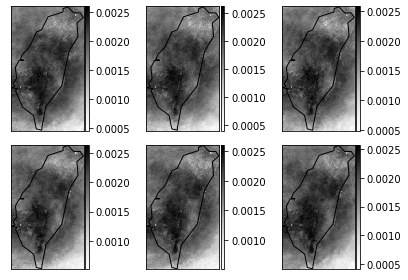

Data with Typhoon Warnings (by CWB, 1517 records)
Data dimensions: 6 layers of 275 x 162


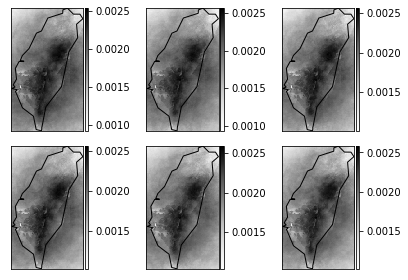

0

In [3]:
# Full Dataset (34369 records)
print("Full Dataset (34369 records)")
pc5 = np.load('data/ln_full_pc5.npy', allow_pickle=True)
d=pc5[0,:].reshape(6, 275, 162)
plot_dbz_6maps(d)
# Data with Precipitation >= 1mm (11260 records)
print("Data with Precipitation >= 1mm (11260 records)")
pc5 = np.load('data/ln_fp01_pc5.npy', allow_pickle=True)
d=pc5[0,:].reshape(6, 275, 162)
plot_dbz_6maps(d)
# Data with Precipitation >= 5mm (4456 records)
print("Data with Precipitation >= 5mm (4456 records)")
pc5 = np.load('data/ln_fp05_pc5.npy', allow_pickle=True)
d=pc5[0,:].reshape(6, 275, 162)
plot_dbz_6maps(d)
# Data with Precipitation >= 10mm (2150 records)
print("Data with Precipitation >= 10mm (2150 records)")
pc5 = np.load('data/ln_fp10_pc5.npy', allow_pickle=True)
d=pc5[0,:].reshape(6, 275, 162)
plot_dbz_6maps(d)
# Data with Precipitation >= 20mm (858 records)
print("Data with Precipitation >= 20mm (858 records)")
pc5 = np.load('data/ln_fp20_pc5.npy', allow_pickle=True)
d=pc5[0,:].reshape(6, 275, 162)
plot_dbz_6maps(d)
# Data with Precipitation >= 40mm (236 records)
print("Data with Precipitation >= 40mm (236 records)")
pc5 = np.load('data/ln_fp40_pc5.npy', allow_pickle=True)
d=pc5[0,:].reshape(6, 275, 162)
plot_dbz_6maps(d)
# Data with Typhoon Warnings (by CWB, 1517 records)
print("Data with Typhoon Warnings (by CWB, 1517 records)")
pc5 = np.load('data/ln_ftyw_pc5.npy', allow_pickle=True)
d=pc5[0,:].reshape(6, 275, 162)
plot_dbz_6maps(d)

### Quick Summary

Comparing to the results from the original scale (not taking logarithm), the difference in PC1 between subsets seems more obvious: while the PC1 of all records shows strong variations along the north and west side of the Central Mountain Range, PC1 from heavier rain show more variation on the top and the south and east side of the CMR.


## Precipitations in the PC-Space

Next, let's have a look at the relationship between the PCs and the maximal precipitation.

    timestamp  prec
0  2013010101   0.0
1  2013010102   0.0
2  2013010103   0.0
3  2013010104   0.0
4  2013010105   0.0
Full Dataset (34369 records)


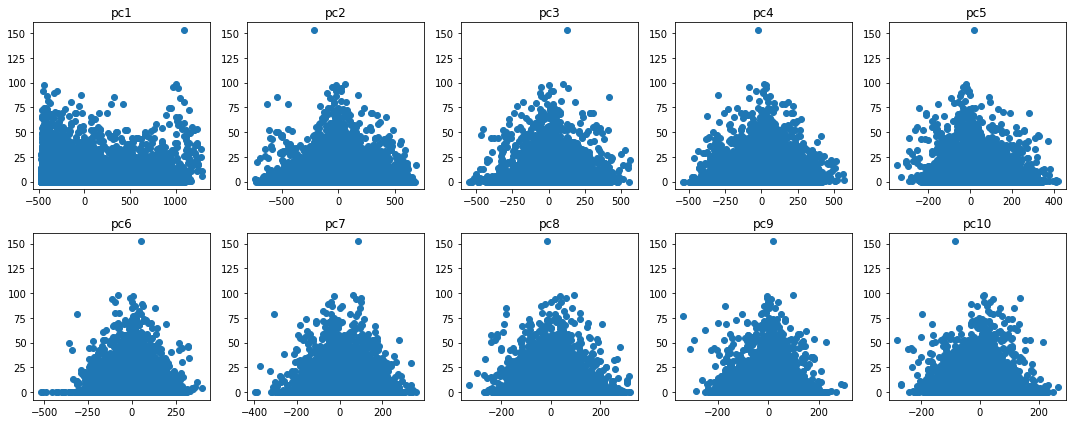

Data with Precipitation >= 40mm (236 records)


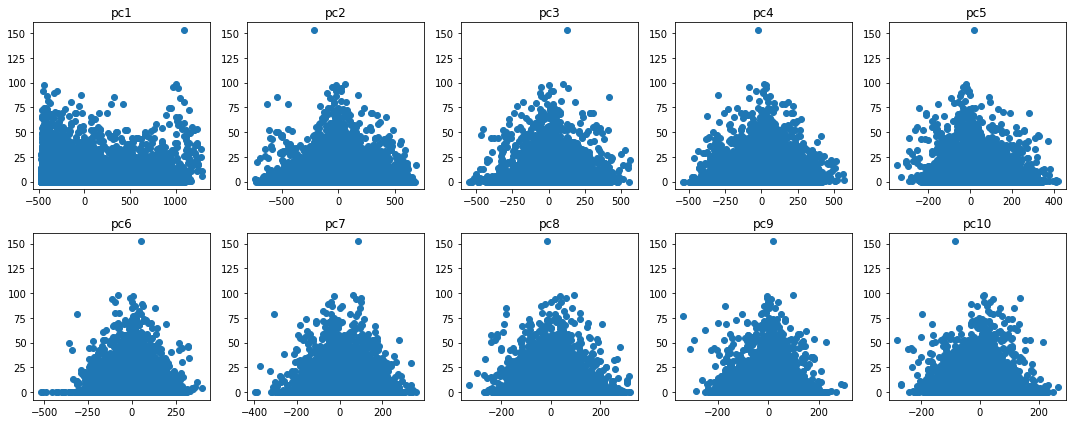

Data with Typhoon Warnings (by CWB, 1517 records)


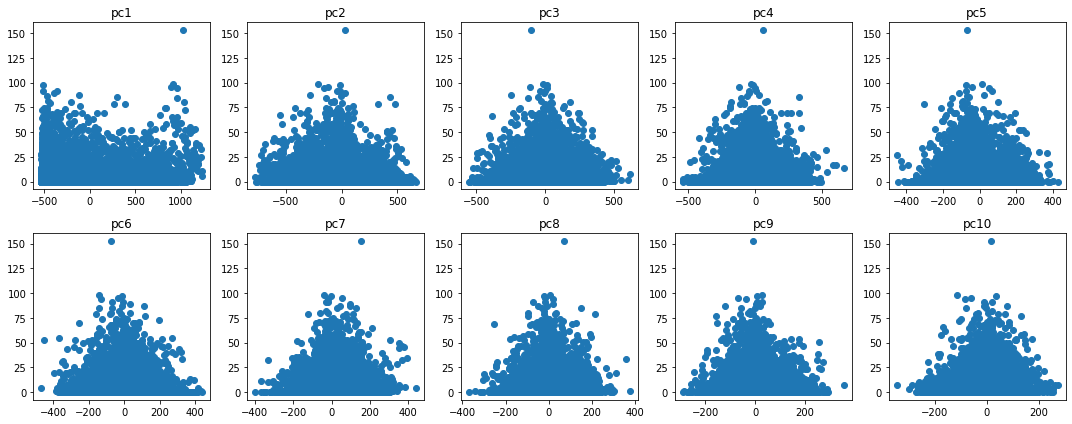

0

In [4]:
# Load precipitation data
import numpy as np
import pandas as pd
# Read precipitation data
tmp = pd.read_csv('./data/t1hr.csv')
# Calculate maximal precipitation among 45 stations
dates = tmp['date']
t1hr = tmp.iloc[:,1:]
t1hr_max = pd.DataFrame({'timestamp':dates, 'prec':t1hr.max(axis=1)})
# Test
print(t1hr_max.head())

# Visualization script
%matplotlib inline
import matplotlib.pyplot as plt

def show_prec_on_pc(prec, pcfile, nl=10):
    # Read projections on PCs
    pcs = pd.read_csv(pcfile)
    # Merge two dataframes
    tmp = pd.merge(prec, pcs, on='timestamp')
    # Making plots
    for i in range(nl):
        ax = plt.subplot(2, nl/2, i+1)
        ax.scatter(tmp.iloc[:,i+2],tmp['prec'])
        ax.set_title(tmp.columns[i+2])
    plt.tight_layout()
    plt.show()
    return(0)

# Making plots
# Full Dataset (34369 records)
print("Full Dataset (34369 records)")
plt.figure(figsize=(15,6))
show_prec_on_pc(t1hr_max, '../ws.flt/log/proj_ln_full.csv')
# Data with Precipitation >= 40mm (236 records)
print("Data with Precipitation >= 40mm (236 records)")
plt.figure(figsize=(15,6))
show_prec_on_pc(t1hr_max, '../ws.flt/log/proj_ln_fp40.csv')
# Data with Typhoon Warnings (by CWB, 1517 records)
print("Data with Typhoon Warnings (by CWB, 1517 records)")
plt.figure(figsize=(15,6))
show_prec_on_pc(t1hr_max, '../ws.flt/log/proj_ln_ftyw.csv')

### Quick Summary

The relationship still looks like log-normal or quadratic linear.

### Quadratic Linear Space

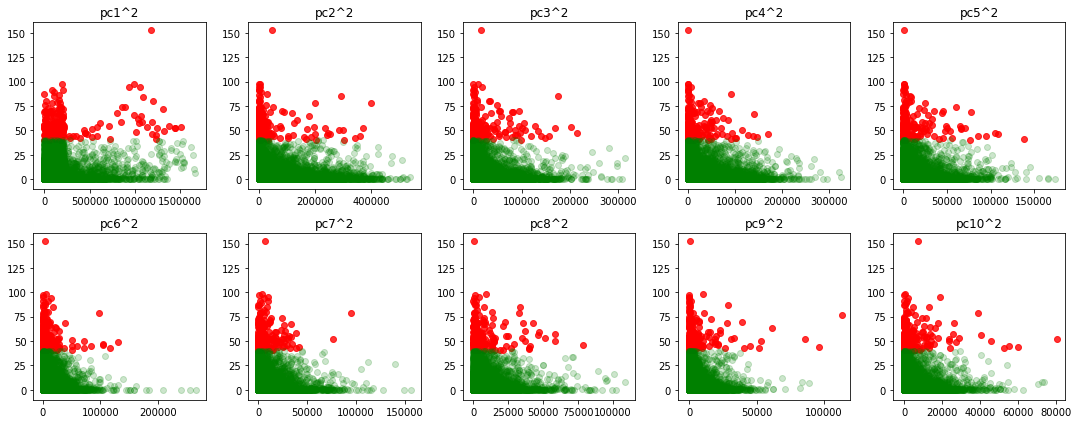

In [5]:
import numpy as np
import pandas as pd

prec = t1hr_max
# Read projections on PCs
pcs = pd.read_csv('../ws.flt/log/proj_ln_full.csv')
# Merge two dataframes
tmp = pd.merge(prec, pcs, on='timestamp')

# Making plots
plt.figure(figsize=(15,6))
tmp['hr'] = (tmp['prec']>40.)
dhr1 = tmp.loc[tmp['hr'],:]
dhr0 = tmp.loc[~tmp['hr'],:]
for i in range(10):
    ax = plt.subplot(2, 10/2, i+1)
    ax.scatter(dhr1.iloc[:,i+2]*dhr1.iloc[:,i+2],dhr1['prec'], c='r', alpha=0.8)
    ax.scatter(dhr0.iloc[:,i+2]*dhr0.iloc[:,i+2],dhr0['prec'], c='g', alpha=0.2)
    ax.set_title(tmp.columns[i+2]+'^2')
plt.tight_layout()
plt.show()

## GLM with Feature Selection

### Input data processing

In [4]:
import numpy as np
import pandas as pd

# Read precipitation data
tmp = pd.read_csv('./data/t1hr.csv')
# Calculate maximal precipitation among 45 stations
dates = tmp['date']
t1hr = tmp.iloc[:,1:]
t1hr_max = pd.DataFrame({'timestamp':dates, 'prec':t1hr.max(axis=1)})

# Read projections
pfull = pd.read_csv('../ws.flt/log/proj_ln_full.csv')
pfp40 = pd.read_csv('../ws.flt/log/proj_ln_fp40.csv')
pftyw = pd.read_csv('../ws.flt/log/proj_ln_ftyw.csv')

# Create new column names
pfull.columns = ['full_'+i for i in pfull.columns]
pfp40.columns = ['fp40_'+i for i in pfp40.columns]
pftyw.columns = ['ftyw_'+i for i in pftyw.columns]
pfull.rename(columns={'full_timestamp':'timestamp'}, inplace=True)
pfp40.rename(columns={'fp40_timestamp':'timestamp'}, inplace=True)
pftyw.rename(columns={'ftyw_timestamp':'timestamp'}, inplace=True)
#print(list(pfull.columns))
#print(list(pfp40.columns))
#print(list(pftyw.columns))

# Clean up
data = pd.merge(pd.merge(pfull.iloc[:,:11], pfp40.iloc[:,:11], on='timestamp'),pftyw.iloc[:,:11], on='timestamp')
data.index = list(data['timestamp'])
data = data.iloc[:,1:]

# Add logarithm
for i in range(data.shape[1]):
    data['squared_'+list(data.columns)[i]] = data.iloc[:,i]**2

# Check
print("Input data shape:")
print(data.shape)
print(list(data.columns))

Input data shape:
(34369, 60)
['full_pc1', 'full_pc2', 'full_pc3', 'full_pc4', 'full_pc5', 'full_pc6', 'full_pc7', 'full_pc8', 'full_pc9', 'full_pc10', 'fp40_pc1', 'fp40_pc2', 'fp40_pc3', 'fp40_pc4', 'fp40_pc5', 'fp40_pc6', 'fp40_pc7', 'fp40_pc8', 'fp40_pc9', 'fp40_pc10', 'ftyw_pc1', 'ftyw_pc2', 'ftyw_pc3', 'ftyw_pc4', 'ftyw_pc5', 'ftyw_pc6', 'ftyw_pc7', 'ftyw_pc8', 'ftyw_pc9', 'ftyw_pc10', 'squared_full_pc1', 'squared_full_pc2', 'squared_full_pc3', 'squared_full_pc4', 'squared_full_pc5', 'squared_full_pc6', 'squared_full_pc7', 'squared_full_pc8', 'squared_full_pc9', 'squared_full_pc10', 'squared_fp40_pc1', 'squared_fp40_pc2', 'squared_fp40_pc3', 'squared_fp40_pc4', 'squared_fp40_pc5', 'squared_fp40_pc6', 'squared_fp40_pc7', 'squared_fp40_pc8', 'squared_fp40_pc9', 'squared_fp40_pc10', 'squared_ftyw_pc1', 'squared_ftyw_pc2', 'squared_ftyw_pc3', 'squared_ftyw_pc4', 'squared_ftyw_pc5', 'squared_ftyw_pc6', 'squared_ftyw_pc7', 'squared_ftyw_pc8', 'squared_ftyw_pc9', 'squared_ftyw_pc10']


### Output data processing

In [5]:
tmp = pd.merge(data, t1hr_max, left_index=True, right_on='timestamp')
y = tmp['prec']

idx2015 = sum(tmp['timestamp']<=2015010101)
print('Data index before 2015')
print(idx2015)
idx2016 = sum(tmp['timestamp']<=2016010101)
print('Data index before 2016')
print(idx2016)

print("Output data shape:")
print(y.shape)

Data index before 2015
17382
Data index before 2016
26059
Output data shape:
(34369,)


### Split the training and testing data

We can simply use 2013 ~ 2015 for training and 2016 for testing. However, since we already know that 2016 is a strange year, let's use 2013/2014 for training and 2015 for testing.

In [6]:
# Split data
x_train = data.iloc[:idx2015,:]
x_test = data.iloc[idx2015:idx2016,:]
y_train = y.iloc[:idx2015,]
y_test = y.iloc[idx2015:idx2016,]

print("Training data dimension:")
print(x_train.shape)
print(y_train.shape)
print("Test data dimension:")
print(x_test.shape)
print(y_test.shape)

Training data dimension:
(17382, 60)
(17382,)
Test data dimension:
(8677, 60)
(8677,)


### Generalized Linear Model

Let's see if we just put everything into a GLM 

In [7]:
import statsmodels.api as sm

# Fit the classifier
glm = sm.GLM(y_train.reset_index(drop=True), x_train.fillna(0.).reset_index(drop=True))
glm_results = glm.fit()

print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   prec   No. Observations:                17382
Model:                            GLM   Df Residuals:                    17342
Model Family:                Gaussian   Df Model:                           39
Link Function:               identity   Scale:                          32.713
Method:                          IRLS   Log-Likelihood:                -54956.
Date:                Mon, 07 Oct 2019   Deviance:                   5.6730e+05
Time:                        22:21:13   Pearson chi2:                 5.67e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
full_pc1              0.0138      0.00

From the table above, we can see that squared projections are more important than the original values. And let's do some feature selection. 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X = x_train.reset_index(drop=True)
y = y_train.reset_index(drop=True)

# Create the RFE object and compute a cross-validated score.
svc = SVR(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=KFold(5), scoring='neg_mean_squared_error', verbose=2, n_jobs=10)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
